# **Laboratorijska vježba 2**: Zadaci za samostalni rad

## **Podaci o poznatim filmovima i njihovoj zaradi**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka o popularnim filmovima (blockbusterima) te njihov financijski učinak. Skup podataka dostupan je u *Data/blockbusters.csv*. 

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

*   Main_Genre - primarni žanr filma
*   Genre_2 
*   Genre_3
*   imdb_rating
*   length - duljina filma u minutama
*   rank_in_year - rank u top 10 filmova objavljenih te godine
*   rating - ocjena publike
*   studio - studio koji je producirao film
*   title - naslov filma
*   worldwide_gross - ukupni prihod filma u svijetu u dolarima
*   year - godina objavljivanja

In [1]:
!head Data/blockbusters.csv

Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
Action,Comedy,,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
Action,Comedy,,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
Action,Adventure,Drama,7,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'

movies = pd.read_csv(data_folder + 'blockbusters.csv')
movies.head(10)



,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
5,Action,Adventure,Drama,7.9,147,6,PG-13,Paramount Pictures,Mission: Impossible - Fallout,"$220,159,104",2018
6,Action,Comedy,NaN,7.2,118,7,PG-13,Walt Disney Pictures,Ant-Man and the Wasp,"$216,648,740",2018
7,Action,Adventure,Drama,7.0,135,8,PG-13,Walt Disney Pictures,Solo: A Star Wars Story,"$213,767,512",2018
8,Action,Adventure,Drama,6.9,112,9,PG-13,Columbia Pictures,Venom,"$213,030,843",2018
9,Music,Drama,NaN,8.1,135,10,R,Warner Bros,A Star is Born,"$199,721,727",2018


## **Zadatak 1: Vizualizacija jedne varijable**

Koristeći naučeno znanje, Vaš je zadatak vizualizirati jednu varijablu koristeći biblioteku Matplotlib. Usredotočite se na stupac 'worldwide_gross' te istražite njegovu distribuciju pomoću histograma i dijagrama pravokutnika. Svaki dijagram mora imati prikladno označene osi i naslov (koristite metode *plt.xlabel()*, *plt.ylabel()* i *plt.title()*). 

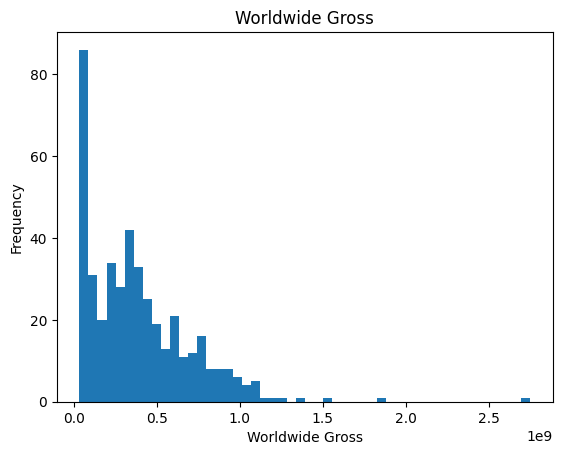

In [40]:
#worldwide_gross = movies['worldwide_gross'].str.replace("$","")
#worldwide_gross = worldwide_gross.str.replace(",","")
#worldwide_gross = worldwide_gross.astype(float)

plt.hist(movies['worldwide_gross'], bins=50)
plt.xlabel('Worldwide Gross')
plt.ylabel('Frequency')
plt.title('Worldwide Gross')
plt.show()



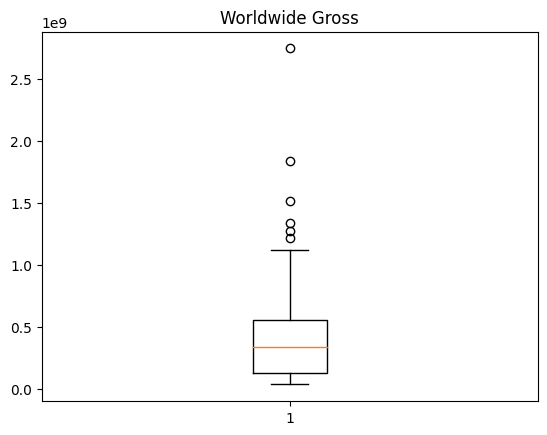

In [42]:
plt.boxplot(movies['worldwide_gross'])
plt.title('Worldwide Gross')
plt.show()

## **Zadatak 2: Vizualizacija dviju kontinuiranih varijabli**

Provjerite ispravnost tvrdnje da blockbusteri s većim IMDB rejtingom ujedno ostvaruju i više prihoda. To možete postići vizualizacijom odnosa između dviju varijabli koje sadrže ove informacije, pri čemu je za vizualizaciju prikladno koristiti dijagram raspršenosti.

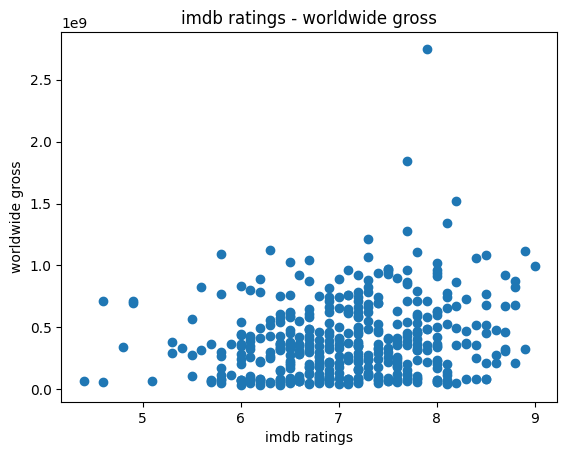

In [46]:
imdb_ratings = movies['imdb_rating']
gross = movies['worldwide_gross']
plt.scatter(imdb_ratings, gross)
plt.xlabel('imdb ratings')
plt.ylabel('worldwide gross')
plt.title('imdb ratings - worldwide gross')
plt.show()


Na dijagram dodajte tzv. "*best-fit*" pravac koji se koristi za izražavanje odnosa različitih podatkovnih točaka u dijagramu raspršenosti. Ovaj pravac predstavlja pravac koji je najmanje udaljen od svih točaka na grafu. 

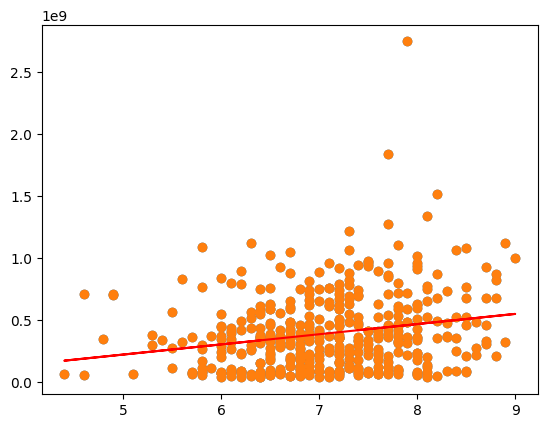

In [50]:
#find line of best fit
a, b = np.polyfit(imdb_ratings, gross, 1)

#add points to plot
plt.scatter(imdb_ratings, gross)

#add line of best fit to plot
plt.plot(imdb_ratings, a*imdb_ratings+b, color='red')
plt.scatter(imdb_ratings, gross)


Uz vizualizaciju, odnos dviju kontinuiranih varijabli možete numerički iskazati izračunavanjem korelacije. Pomoću biblioteke Pandas izračunajte korelaciju između ovih varijabli te ju ispravno protumačite.

In [55]:
corr = movies['imdb_rating'].corr(movies['worldwide_gross'])
print(f"The correlation between imdb rating and worldwide gross is: {corr}. The correlation is positive and mild.")

The correlation between imdb rating and worldwide gross is: 0.21325728109060604


Uz odnos ovih dviju varijabli, bilo bi zanimljivo prikazati i razlike u njihovim distribucijama. Ove razlike možete vizualizirati zajedničkim dijagramom (jointplot iz biblioteke Seaborn) koji ujedno prikazuje njihov dijagram raspršenosti te distribucije pomoću stupčastih dijagrama. Prokomentirajte razliku u distribucijama ovih dviju varijabli.

The distribution of imdb ratings is even but distribution of worldwide gross is showing that a lot more movies don't
 make a lot of money in comparasion to the highest movie gross


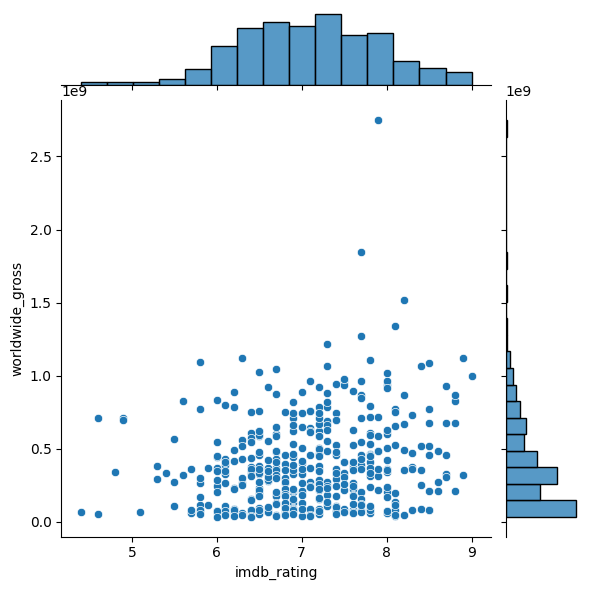

In [60]:
sns.jointplot(data=movies, x=imdb_ratings, y=gross)
print("The distribution of imdb ratings is even but distribution of worldwide gross is showing that a lot more movies don't\n make a lot of money in comparasion to the highest movie gross")

## **Zadatak 3: Vizualizacija odnosa kontinuirane i kategoričke varijable**

Razmotrite pet najzastupljenijih žanrova te ispitajte njihove prihode. Vizualizirajte odnos između ovih varijabli koristeći stupčasti dijagram, dijagram pravokutnika te violinske dijagrame. 

Thriller    63
Comedy      55
Fantasy     54
Sci-Fi      50
Romance     48
Name: Main_Genre, dtype: int64


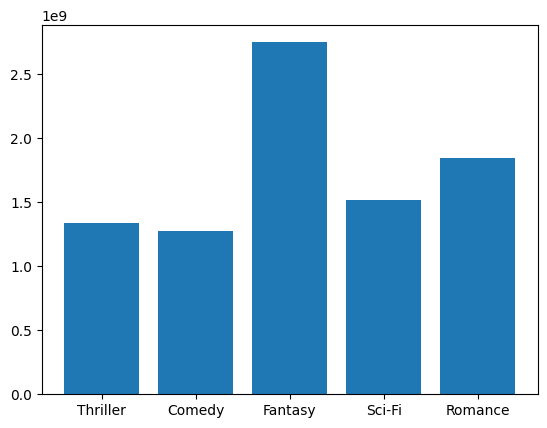

In [77]:
top_5 = movies['Main_Genre'].value_counts().head(5)
#top_5 = movies.sort_values(ascending=False,by='worldwide_gross').head(5)
print(top_5)

thriller_movies = movies[movies['Main_Genre'] == 'Thriller']
comedy_movies = movies[movies['Main_Genre'] == 'Comedy']
fantasy_movies = movies[movies['Main_Genre'] == 'Fantasy']
scifi_movies = movies[movies['Main_Genre'] == 'Sci-Fi']
romance = movies[movies['Main_Genre'] == 'Romance']

genre_titles = {'Thriller', 'Comedy', 'Fantasy', 'Sci-Fi', 'Romance'}

top_5_genre = pd.concat([thriller_movies, comedy_movies, fantasy_movies, scifi_movies, romance])

plt.bar(top_5_genre['Main_Genre'],top_5_genre['worldwide_gross'])
plt.show()

<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

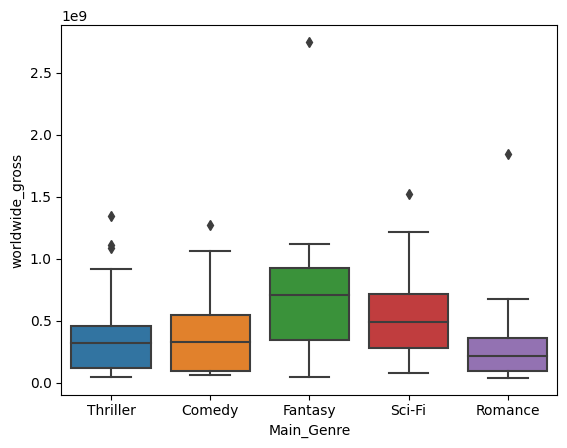

In [85]:
sns.boxplot(x='Main_Genre',y='worldwide_gross',data=top_5_genre)



<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

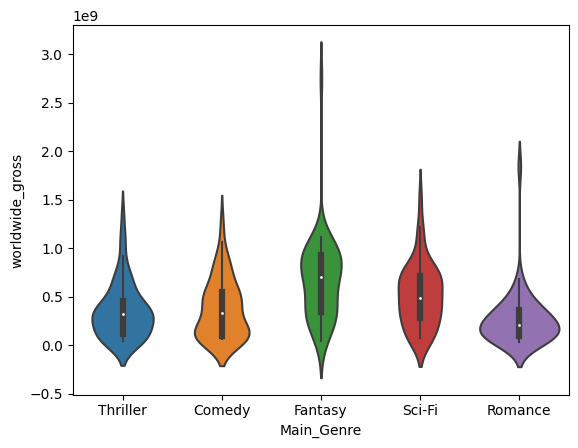

In [86]:
sns.violinplot(x='Main_Genre',y='worldwide_gross',data=top_5_genre)


## **Zadatak 4: Vizualizacija neizvjesnosti**

Pokušajte odgovoriti na pitanje kako bi se kretao prosječni prihod od blockbustera? Vizualizirajte prosječni godišnji svjetski bruto prihod, zajedno sa standardnom devijacijom. Devijaciju možete vizualizirati pomoću vizualizacije grešaka, odnosno metoda *errorbar* i *fill_between* iz biblioteke Matplotlib. Pomoć: grupirajte retke DataFrame-a prema godini te primijenite prikladnu metodu agregacije nad stupcem od interesa.

Je li se prosječni prihod povećao ili smanjio tijekom vremena? Što opažate?

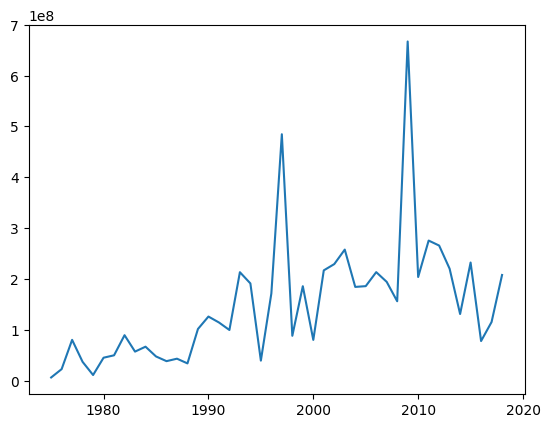

TypeError: errorbar() missing 1 required positional argument: 'y'

In [95]:
grouped = movies.groupby('year')

average_yearly_income = grouped.agg(
    {
        'worldwide_gross': 'mean',
        'worldwide_gross': 'std'
    }
)

plt.plot(average_yearly_income)
plt.show()
print("average income has grown in recent years.")





## **Zadatak 5: Stvaranje višestrukih dijagrama**

Nadalje, pokušajmo razumjeti koliko dugo blockbusteri traju u različitim žanrovima. Kad radite s velikim brojem kategorija (postoji 16 žanrova u skupu podataka), vizualizacije se lako zatrpaju i postaju nepregledne. Tada je korisno grupirati dijagrame u višestruke dijagrame. 

Napravite višestruki dijagram koji se sastoji od mreže od 4x4 dijagrama za 16 filmskih žanrova. U svakom poddijagramu prikažite histogram s distribucijom duljine filma za različite kategorije. Odgovorite na pitanje kojim žanrovima pripadaju najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

In [ ]:
# Mjesto za Vaš kod

## **Zadatak 6: Toplinske karte (Heatmaps)**

Zadnje što nas zanima jest koji filmski studiji izrađuju blockbustere za koji žanr. Postoji mnogo studija i mnogo žanrova. Pri radu s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s posebnim dijagramom (kao što je stupčasti dijagram ili dijagram pravokutnika). U tom slučaju, postaje korisno predstaviti njihov odnos pomoću toplinske karte, gdje brojevi predstavljaju broj kombinacija koji se pojavljuje u skupu podataka. 

Vizualizirajte broj blockbustera koje je napravio svaki studio za svaki žanr. Pomoć: koristite metodu *heatmap()* iz biblioteke Seaborn.

In [ ]:
# Mjesto za Vaš kod

Pomoću izrađene vizualizacije, pokušajte odgovoriti na sljedeća pitanja:

*   U koje žanrove spada većina filmova koje snima studio Warner Bros?
*   Koji je najuspješniji žanr filmskih filmova Walta Disneya?
*   Koji je studio napravio najveći broj ljubavnih blockbustera?

